In [1]:
%pip install openpyxl
%pip install tabulate
%pip install xgboost
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import all the Necessary libraries

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tabulate import tabulate
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, StackingClassifier
import warnings
warnings.filterwarnings('ignore')

# Upload & Load the Dataset

In [15]:
# Specify or prompt for the file path
file_path = r"C:\Users\Admin\Desktop\Course Stuffs\CSE course stuffs\Machine Learning Stufs\RTA Data 2020 to July 2023.xlsx"

# Load the dataset
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display initial info about the dataset
print("Initial dataset info:")
print(df.info())

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object        
 

In [16]:
# displaying the first few rows of the dataset
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Checking the Number of Rows & Columns of the dataset
df.shape

(46189, 25)

In [18]:
# Checking the Names of the columns
df.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

In [19]:
# Renaming columns to fix typos
df.rename(columns={
    'BicycleInvovled': 'BicycleInvolved',
    'CartInvovled': 'CartInvolved',
    'TractorInvovled': 'TractorInvolved'
}, inplace=True)

print("Updated column names:")
print(df.columns)

Updated column names:
Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvolved', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvolved', 'RickshawsInvolved', 'TractorInvolved',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')


# **Pre-Processing Steps**

In [20]:
#Creating a copy of the Dataset
df_copy = df.copy()

#finding missing values
df_copy.isnull().sum()

EcYear                          0
EcNumber                     7211
CallTime                     5956
EmergencyArea                   1
TotalPatientsInEmergency        0
Gender                          1
Age                             1
HospitalName                21950
Reason                          1
responsetime                    5
EducationTitle                  1
InjuryType                      2
Cause                           2
PatientStatus                   2
BicycleInvolved                 2
BikesInvolved                   2
BusesInvolved                   2
CarsInvolved                    2
CartInvolved                    2
RickshawsInvolved               2
TractorInvolved                 2
TrainsInvovled                  2
TrucksInvolved                  2
VansInvolved                    2
OthersInvolved                  2
dtype: int64

In [21]:
# Checking the Total Number of Missing values in the Dataset
df_copy.isnull().sum().sum()

np.int64(35155)

In [22]:
# Calculate the percentage of missing values in each row
df_copy['Missing%'] = df_copy.isnull().sum(axis=1) / len(df_copy.columns) * 100

print(df_copy['Missing%'])

0        0.0
1        4.0
2        0.0
3        4.0
4        4.0
        ... 
46184    8.0
46185    0.0
46186    4.0
46187    4.0
46188    4.0
Name: Missing%, Length: 46189, dtype: float64


In [23]:
# Filter out rows with more than 25% missing values
df_filtered = df_copy[df_copy['Missing%'] <= 25]

# Checking the number of Rows & Columns after filtering
df_filtered.shape

(46187, 26)

In [24]:
# Identifying numerical columns in the dataset
numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Applying KNN Imputer to numerical columns
knn_imputer = KNNImputer(n_neighbors=5)

# Performing imputation
df_filtered[numerical_cols] = knn_imputer.fit_transform(df_filtered[numerical_cols])

# Checking if missing values have been reduced
print(f"Missing values after KNN Imputation:\n{df_filtered.isnull().sum()}")

# Checking the shape of the dataset after imputation
print(f"Shape of the dataset after KNN imputation: {df_filtered.shape}")

Missing values after KNN Imputation:
EcYear                          0
EcNumber                     7211
CallTime                     5956
EmergencyArea                   1
TotalPatientsInEmergency        0
Gender                          0
Age                             0
HospitalName                21949
Reason                          0
responsetime                    0
EducationTitle                  0
InjuryType                      0
Cause                           0
PatientStatus                   0
BicycleInvolved                 0
BikesInvolved                   0
BusesInvolved                   0
CarsInvolved                    0
CartInvolved                    0
RickshawsInvolved               0
TractorInvolved                 0
TrainsInvovled                  0
TrucksInvolved                  0
VansInvolved                    0
OthersInvolved                  0
Missing%                        0
dtype: int64
Shape of the dataset after KNN imputation: (46187, 26)


In [25]:
# Dropping the Missing% Column
df_filtered.drop('Missing%', axis=1, inplace=True)

In [26]:
# Checking the Number of Rows & Columns after dropping the %Missing column
df_filtered.shape

(46187, 25)

In [27]:
#finding duplicates
df_filtered.duplicated().sum()

np.int64(8)

In [28]:
#remove duplicates values
df_filtered.drop_duplicates()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvolved,RickshawsInvolved,TractorInvolved,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,NaN,NaT,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,"RHC,Mandra,Rawalpindi",.,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
46185,2023,356986,2023-01-01 04:23:00,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,DHQ,Bike slipped due to over speed.(RIN.6276) C D...,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46186,2023,356981,2023-01-01 02:16:00,Main Bakra Mandi Chowk Rwp,1,Female,10.0,NaN,RLF-2193 coure and ICT-593 corolla car colliped,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,2023,356980,2023-01-01 02:02:00,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,NaN,Bike slipped due to Over speed ( Bike no TSH ...,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Check number of rows before and after
print("Rows before removing duplicates:", len(df_filtered))
df_filtered = df_filtered.drop_duplicates()
print("Rows after removing duplicates:", len(df_filtered))

Rows before removing duplicates: 46187
Rows after removing duplicates: 46179


In [30]:
# Checking the Number of Duplicate values in the Dataset
df_filtered.duplicated().sum()

np.int64(0)

Replacing the Remaining Missing Values

In [33]:
#using Forward Fill for HospitalName
df_filtered['HospitalName'] = df_filtered['HospitalName'].ffill(axis=None, inplace=False, limit=None)

#using Mode value for EmergencyArea
df_filtered['EmergencyArea'] = df_filtered['EmergencyArea'].fillna(df_filtered['EmergencyArea'].mode()[0])

#Interpolating the missing EcNumber
df_filtered['EcNumber'] = df_filtered['EcNumber'].infer_objects().interpolate(method='linear')

In [34]:
# Drop rows where PatientStatus is missing
df_filtered = df_filtered[df_filtered['PatientStatus'].notna()]

# Rechecking the Number of Rows & Columns
df_filtered.shape

(46179, 25)

In [35]:
# Rechecking the Number of Null values
df_filtered.isnull().sum()

EcYear                         0
EcNumber                       0
CallTime                    5948
EmergencyArea                  0
TotalPatientsInEmergency       0
Gender                         0
Age                            0
HospitalName                   0
Reason                         0
responsetime                   0
EducationTitle                 0
InjuryType                     0
Cause                          0
PatientStatus                  0
BicycleInvolved                0
BikesInvolved                  0
BusesInvolved                  0
CarsInvolved                   0
CartInvolved                   0
RickshawsInvolved              0
TractorInvolved                0
TrainsInvovled                 0
TrucksInvolved                 0
VansInvolved                   0
OthersInvolved                 0
dtype: int64

In [36]:
# Checking Unique values
df_filtered.nunique()

EcYear                          4
EcNumber                    41358
CallTime                    40168
EmergencyArea               37518
TotalPatientsInEmergency       12
Gender                          3
Age                           100
HospitalName                  161
Reason                      23939
responsetime                   72
EducationTitle                  8
InjuryType                      5
Cause                           7
PatientStatus                   3
BicycleInvolved                 3
BikesInvolved                   5
BusesInvolved                   3
CarsInvolved                    6
CartInvolved                    2
RickshawsInvolved               3
TractorInvolved                 2
TrainsInvovled                  2
TrucksInvolved                  4
VansInvolved                    5
OthersInvolved                  3
dtype: int64

In [37]:
#finding garbage value
for i in df_filtered.select_dtypes(include="object").columns:
  print(df_filtered[i].value_counts())
  print("***"*10)

EcYear
2022    12900
2021    12674
2020    11379
2023     9226
Name: count, dtype: int64
******************************
EmergencyArea
 Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.     43
 Cod Chowk Adyala Road Rawalpindi                           38
 502 Chowk, Adyala Road, Rwp                                33
Near Pc Hotel Signal Mall Road Rwp                          31
 22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi         29
                                                            ..
 N/r chiring cross peshawer road rwp                         1
Afsha coloni punjab cash & carry range road                  1
Main Bakra Mandi Chowk Rwp                                   1
 Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp            1
Infront of rasheed sweets kamran market kashmir road Rwp     1
Name: count, Length: 37518, dtype: int64
******************************
TotalPatientsInEmergency
1     36151
2      7312
3      1580
4       482
5       256
6       132
7   

**Converting DataTypes**

In [38]:
# Convert 'EcYear' to numeric, setting non-numeric values to NaN
df_filtered['EcYear'] = pd.to_numeric(df_filtered['EcYear'], errors='coerce')

# Keep only valid years
valid_years = [2020, 2021, 2022, 2023]
df_filtered['EcYear'] = df_filtered['EcYear'].apply(lambda x: x if x in valid_years else np.nan)

# Convert 'EcNumber' to numeric, setting non-numeric values to NaN
df_filtered['EcNumber'] = pd.to_numeric(df_filtered['EcNumber'], errors='coerce')

# Convert 'TotalPatientsInEmergency' to numeric, setting non-numeric values to NaN
df_filtered['TotalPatientsInEmergency'] = pd.to_numeric(df_filtered['TotalPatientsInEmergency'], errors='coerce')

df_filtered['CallTime'] = pd.to_datetime(df_filtered['CallTime'])
reference_date = df_filtered['CallTime'].min()
df_filtered['CallTime'] = (df_filtered['CallTime'] - reference_date).dt.total_seconds()
df_filtered['CallTime'] = df_filtered['CallTime'].fillna(method='ffill')

# Function to replace 'Same' with previous non-'Same' value
def replace_same(column):
    mask = column.str.lower().str.strip() == 'same'
    column.loc[mask] = np.nan
    return column.fillna(method='ffill')

# Apply the function to replace 'Same' in the Reason column
df_filtered['Reason'] = replace_same(df_filtered['Reason'])

In [39]:
# Checking the Number of Null values
df_filtered.isnull().sum()

EcYear                      0
EcNumber                    0
CallTime                    0
EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      0
Age                         0
HospitalName                0
Reason                      0
responsetime                0
EducationTitle              0
InjuryType                  0
Cause                       0
PatientStatus               0
BicycleInvolved             0
BikesInvolved               0
BusesInvolved               0
CarsInvolved                0
CartInvolved                0
RickshawsInvolved           0
TractorInvolved             0
TrainsInvovled              0
TrucksInvolved              0
VansInvolved                0
OthersInvolved              0
dtype: int64

In [40]:
# Checking the Name of the Columns
df_filtered.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvolved', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvolved', 'RickshawsInvolved', 'TractorInvolved',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

In [41]:
df_filtered.shape

(46179, 25)

In [42]:
# Replace 'Other' in Gender column with Interpolation
df_filtered['Gender'] = df_filtered['Gender'].replace('Other', np.nan)
df_filtered['Gender'] = df_filtered['Gender'].interpolate(method='ffill')

**Numerical Features before the Outlier Removal**

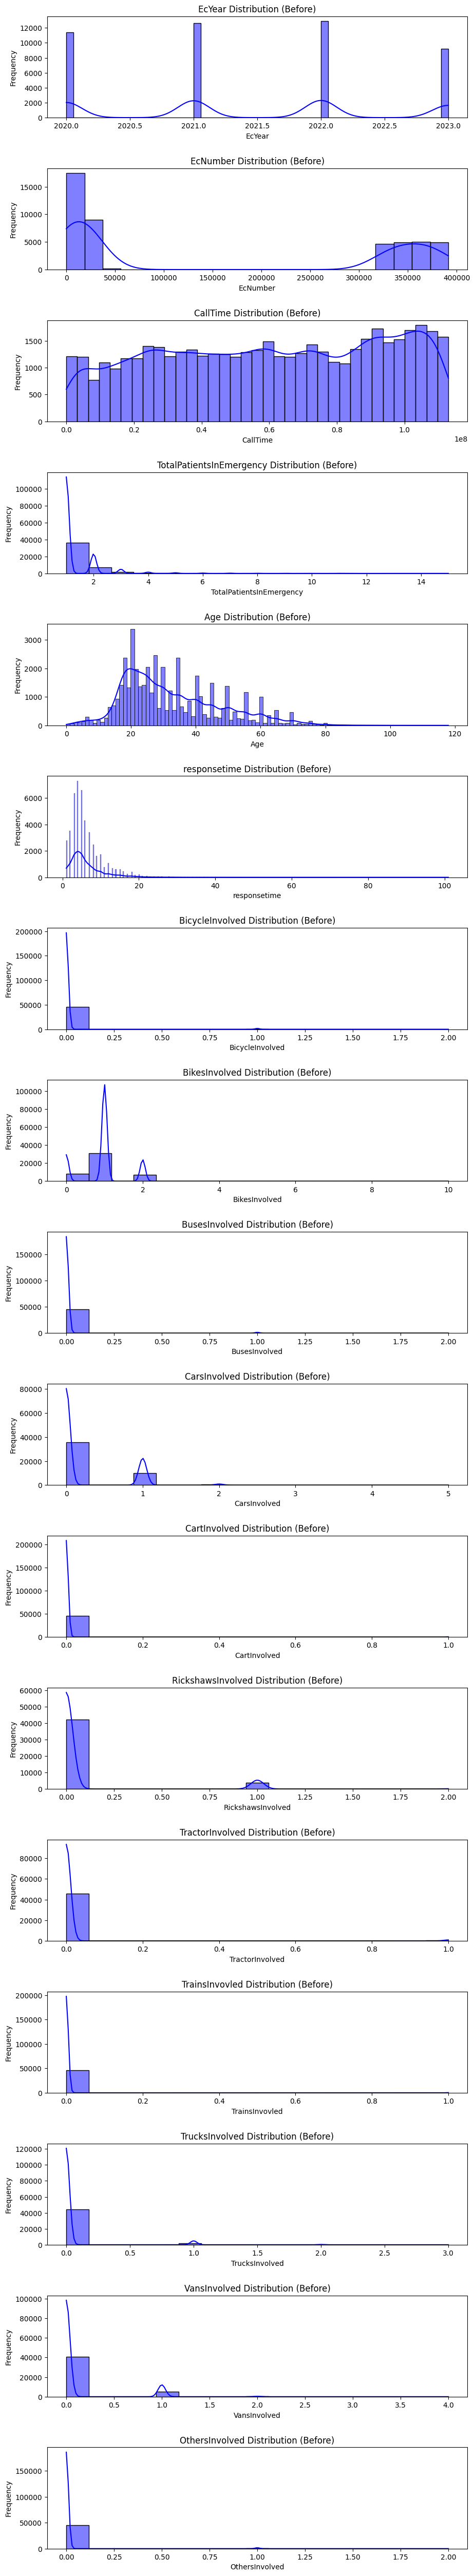

In [43]:
# Filter only numerical columns
numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Plot distributions of numerical columns before outlier removal
def plot_distributions(df_filtered, numerical_columns, title_suffix):
    fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, len(numerical_columns) * 3))
    fig.tight_layout(pad=5.0)

    for i, col in enumerate(numerical_columns):
        sns.histplot(df_filtered[col].dropna(), kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'{col} Distribution {title_suffix}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    plt.show()

# Plot for original data
plot_distributions(df_filtered, numerical_columns, "(Before)")

**Outlier Treatment**

In [44]:
numerical_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()

def remove_outliers(df_filtered, cols):
    for col in cols:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

df_cleaned = remove_outliers(df_filtered, numerical_cols)

df_cleaned.shape

(14547, 25)

**Neumerical Features after the Outlier Removal**

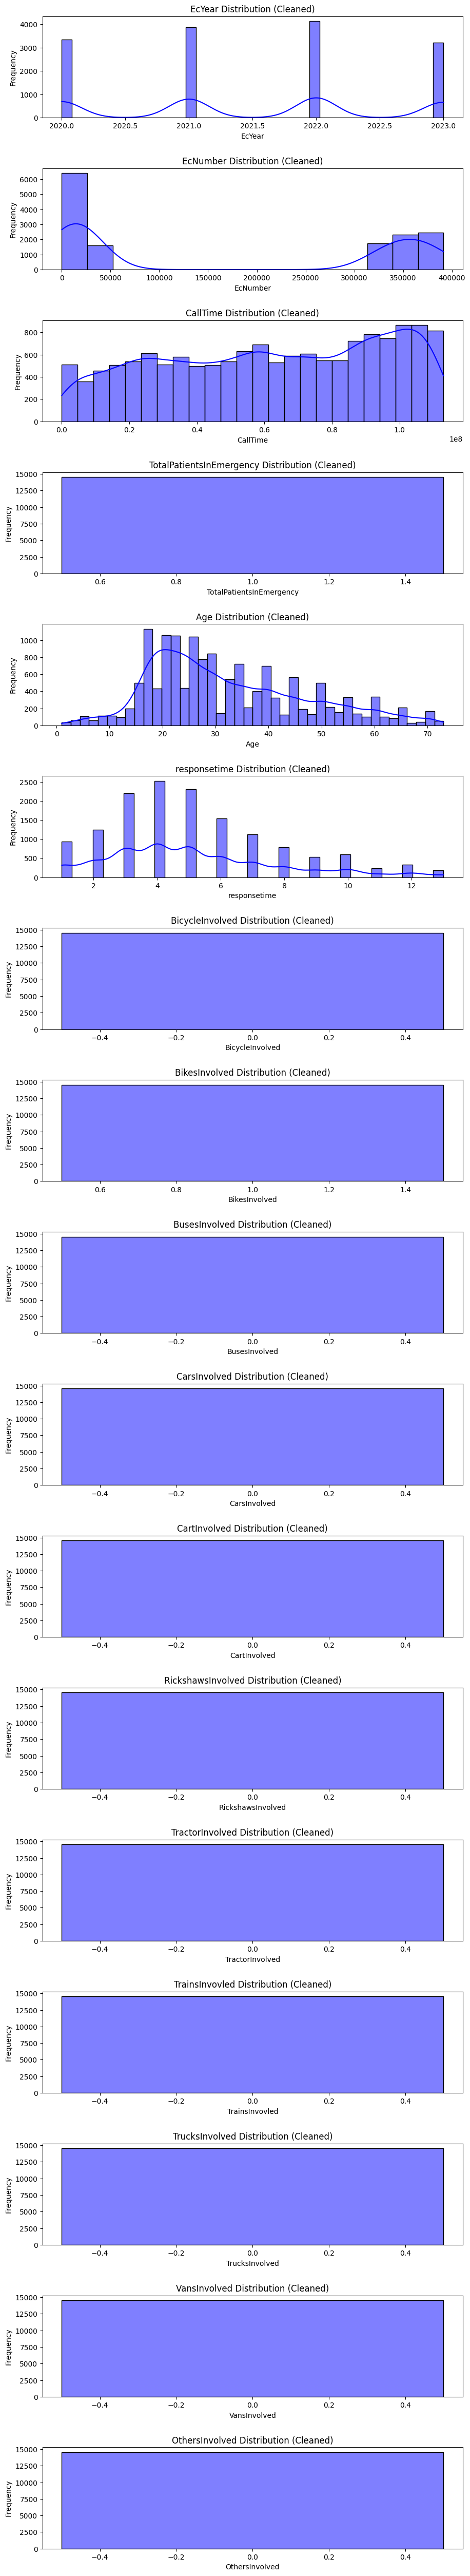

In [45]:
# Plot for cleaned data
plot_distributions(df_cleaned, numerical_cols, "(Cleaned)")

In [46]:
# Checking columns after Outlier Removal
df_cleaned.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvolved', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvolved', 'RickshawsInvolved', 'TractorInvolved',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

**Feature Scaling**

In [47]:
# Using StandardScaler to Normalize the dataset
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Check the normalized data
print("Dataset after normalization:")
df_cleaned[numerical_cols].head()

Dataset after normalization:


,EcYear,EcNumber,CallTime,TotalPatientsInEmergency,Age,responsetime,BicycleInvolved,BikesInvolved,BusesInvolved,CarsInvolved,CartInvolved,RickshawsInvolved,TractorInvolved,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,-1.393643,-0.799182,-0.934973,0.0,-0.357181,1.761848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-1.393643,-0.799253,-0.935260,0.0,-0.965991,-0.053403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-1.393643,-0.799294,-0.935403,0.0,-0.492472,-0.416453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.393643,-0.799306,-0.935450,0.0,-0.965991,-0.416453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,-1.393643,-0.799400,-0.935817,0.0,1.266310,-1.142554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Checking the Number of Rows & Columns
df_cleaned.shape

(14547, 25)

In [49]:
# Using LabelEncoder to encode the categorical data
label_encoder = LabelEncoder()

# Get the list of categorical columns
categorical_cols = df_cleaned.select_dtypes(include=[object]).columns.tolist()

# Label encode binary categorical columns
binary_cols = [col for col in categorical_cols if df_cleaned[col].nunique() == 2]
for col in binary_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

#Spearate target variables from features
target_cols = ['PatientStatus', 'InjuryType']

#Label Encode Target Cols
for col in target_cols:
    df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col])

feature_cols = [col for col in categorical_cols if col not in target_cols and df_cleaned[col].nunique() > 2]

# One-hot encode multi-category columns
df_cleaned = pd.get_dummies(df_cleaned, columns=feature_cols, drop_first=True)

# Check the encoded data
df_cleaned.head()

,EcYear,EcNumber,CallTime,TotalPatientsInEmergency,Gender,Age,responsetime,InjuryType,PatientStatus,BicycleInvolved,...,EducationTitle_Masters,EducationTitle_Matric,EducationTitle_Middle,EducationTitle_Primary,Cause_One Wheeling,Cause_Others,Cause_Over Speed,Cause_Tyre Burst,Cause_U Turn,Cause_Wrong Turn
0,-1.393643,-0.799182,-0.934973,0.0,1,-0.357181,1.761848,1,1,0.0,...,False,False,False,False,False,False,True,False,False,False
6,-1.393643,-0.799253,-0.935260,0.0,1,-0.965991,-0.053403,0,1,0.0,...,False,True,False,False,False,False,True,False,False,False
7,-1.393643,-0.799294,-0.935403,0.0,1,-0.492472,-0.416453,3,1,0.0,...,False,False,False,True,False,False,False,False,False,False
8,-1.393643,-0.799306,-0.935450,0.0,1,-0.965991,-0.416453,3,1,0.0,...,False,True,False,False,False,False,False,False,False,False
14,-1.393643,-0.799400,-0.935817,0.0,1,1.266310,-1.142554,1,1,0.0,...,False,False,False,True,False,False,False,False,False,False


In [50]:
# Checking the number of Rows & Columns after Encoding
df_cleaned.shape

(14547, 21514)

**Before PreProcessing & After PreProcessing Comparison**

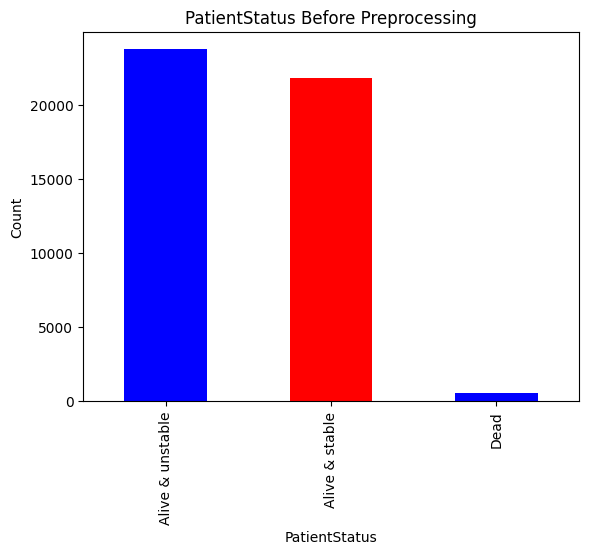

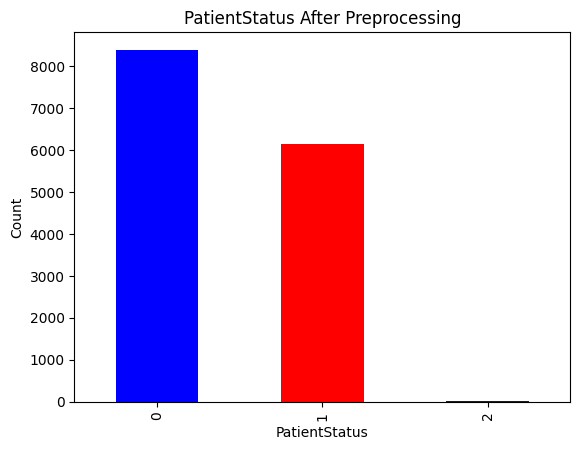

In [51]:
# Bar Plot of Patient Status before PreProcessing
df['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('PatientStatus Before Preprocessing')
plt.xlabel('PatientStatus')
plt.ylabel('Count')
plt.show()

# Bar Plot of Patient Status after PreProcessing
df_cleaned['PatientStatus'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('PatientStatus After Preprocessing')
plt.xlabel('PatientStatus')
plt.ylabel('Count')
plt.show()

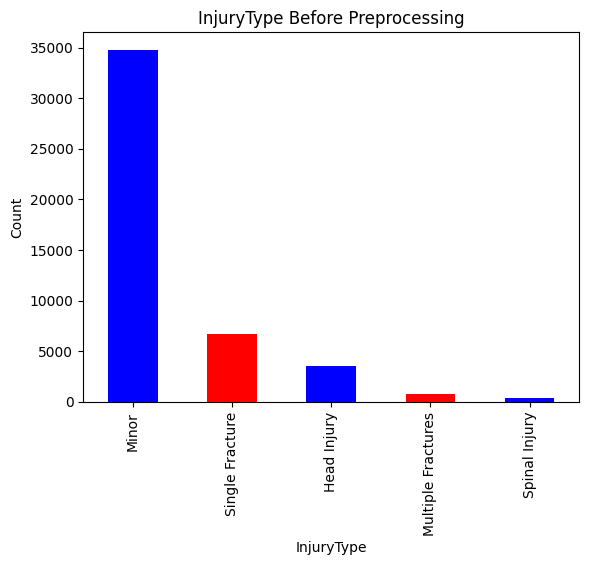

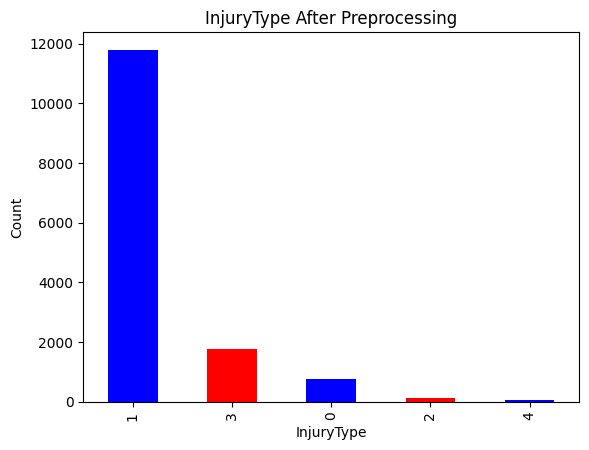

In [52]:
# Bar Plot of Injury Type before PreProcessing
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('InjuryType Before Preprocessing')
plt.xlabel('InjuryType')
plt.ylabel('Count')
plt.show()

# Bar Plot of Injury Type after PreProcessing
df_cleaned['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('InjuryType After Preprocessing')
plt.xlabel('InjuryType')
plt.ylabel('Count')
plt.show()

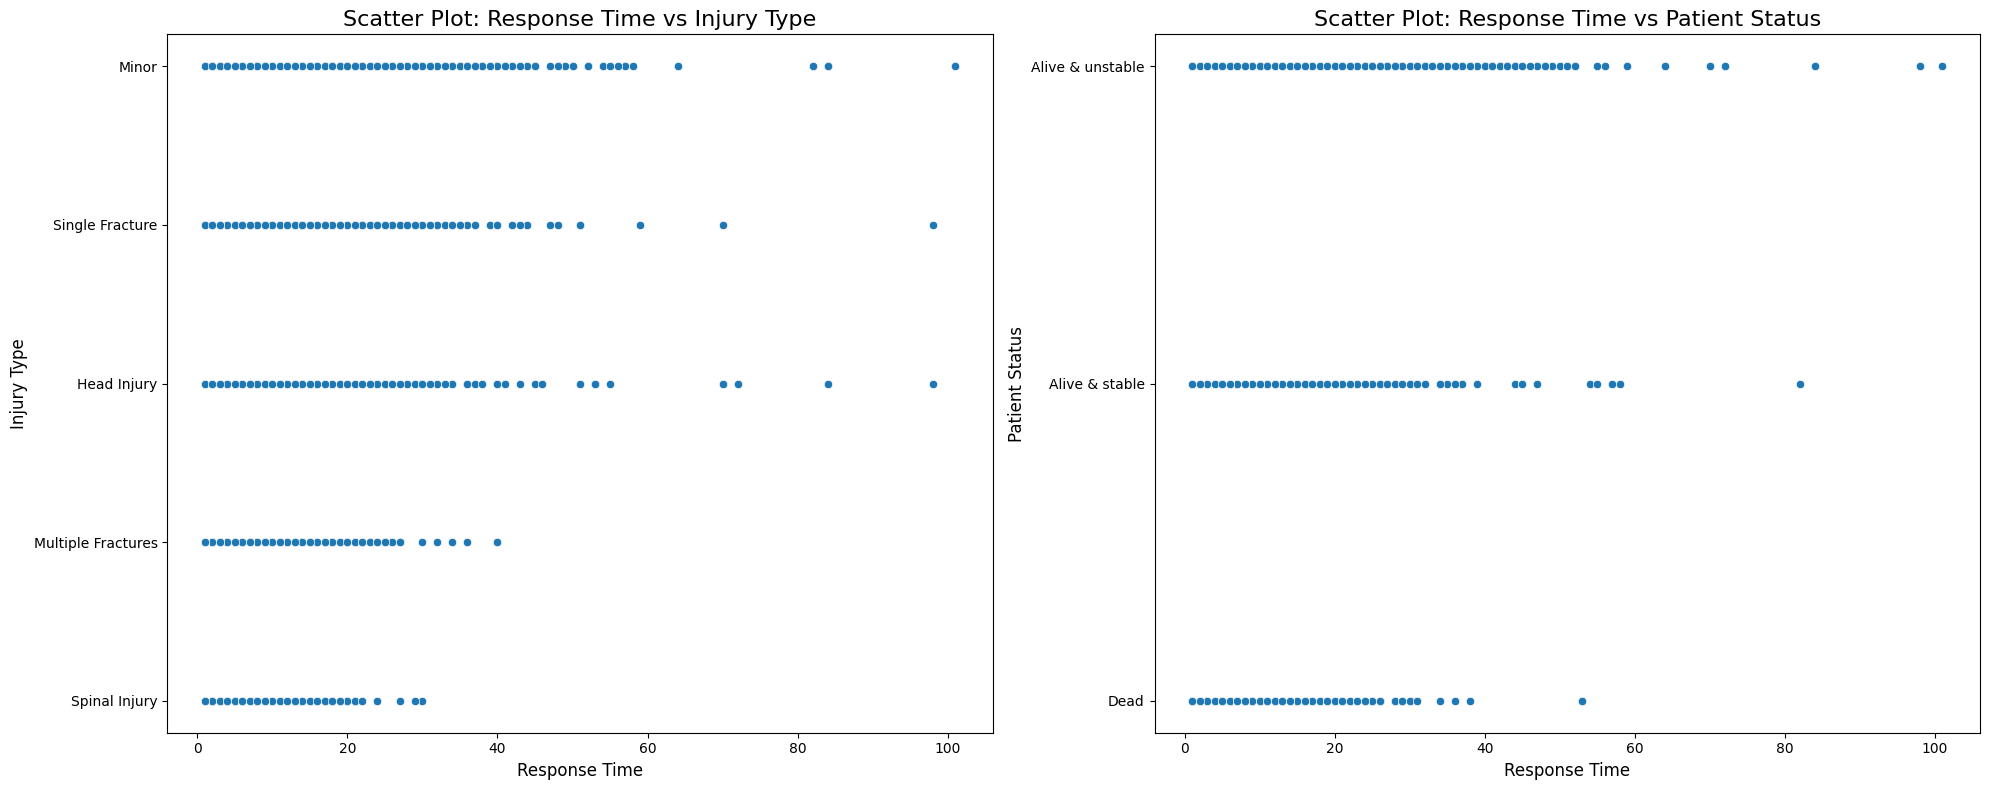

In [53]:
# Scatter plots for targets before PreProcessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot for Injury Type
sns.scatterplot(data=df, x='responsetime', y='InjuryType', ax=ax1)
ax1.set_title('Scatter Plot: Response Time vs Injury Type', fontsize=16)
ax1.set_xlabel('Response Time', fontsize=12)
ax1.set_ylabel('Injury Type', fontsize=12)

# Scatter plot for Patient Status
sns.scatterplot(data=df, x='responsetime', y='PatientStatus', ax=ax2)
ax2.set_title('Scatter Plot: Response Time vs Patient Status', fontsize=16)
ax2.set_xlabel('Response Time', fontsize=12)
ax2.set_ylabel('Patient Status', fontsize=12)

plt.tight_layout()
plt.show()

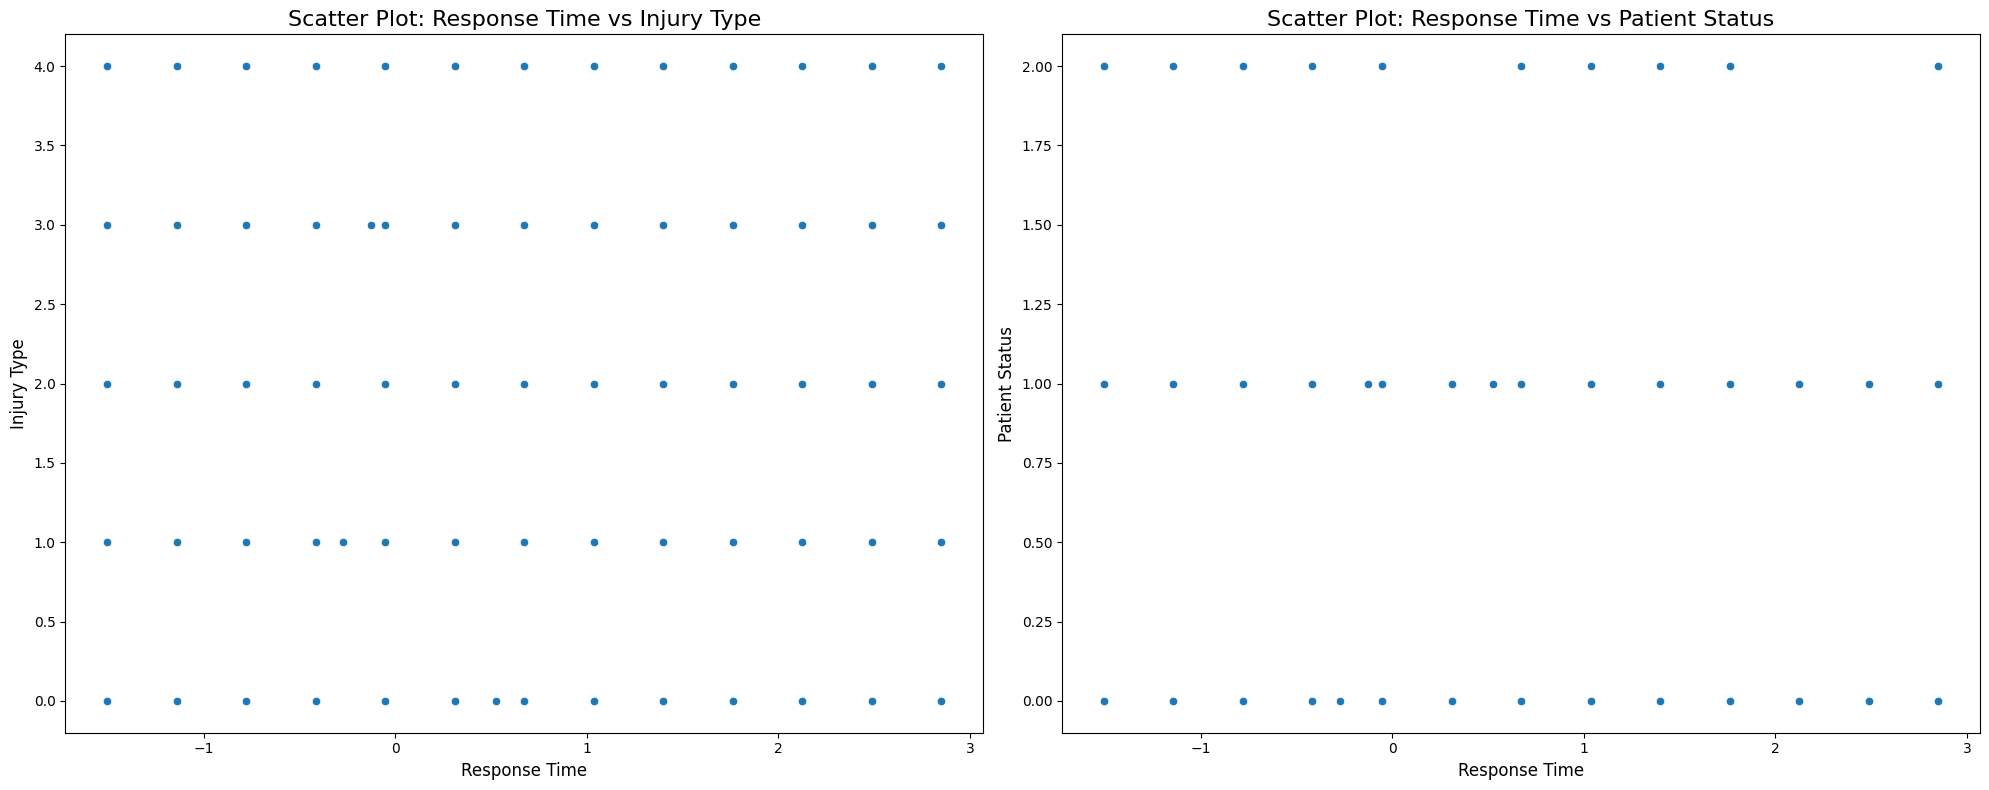

In [54]:
# Scatter plots for targets after PreProcessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot for Injury Type
sns.scatterplot(data=df_cleaned, x='responsetime', y='InjuryType', ax=ax1)
ax1.set_title('Scatter Plot: Response Time vs Injury Type', fontsize=16)
ax1.set_xlabel('Response Time', fontsize=12)
ax1.set_ylabel('Injury Type', fontsize=12)

# Scatter plot for Patient Status
sns.scatterplot(data=df_cleaned, x='responsetime', y='PatientStatus', ax=ax2)
ax2.set_title('Scatter Plot: Response Time vs Patient Status', fontsize=16)
ax2.set_xlabel('Response Time', fontsize=12)
ax2.set_ylabel('Patient Status', fontsize=12)

plt.tight_layout()
plt.show()

In [55]:
df_cleaned.isnull().sum().sum()

np.int64(0)

In [56]:
df_cleaned.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'TotalPatientsInEmergency', 'Gender',
       'Age', 'responsetime', 'InjuryType', 'PatientStatus', 'BicycleInvolved',
       ...
       'EducationTitle_Masters', 'EducationTitle_Matric',
       'EducationTitle_Middle', 'EducationTitle_Primary', 'Cause_One Wheeling',
       'Cause_Others', 'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn',
       'Cause_Wrong Turn'],
      dtype='object', length=21514)

**Checking correlation between the columns**

In [57]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Defining the correlation matrix
corr_matrix = df_cleaned.select_dtypes(include=['number']).corr()

# Filter numerical_cols to include only those that exist in corr_matrix
numerical_cols_in_corr = [col for col in numerical_cols if col in corr_matrix.columns]

# Check if 'PatientStatus' and 'InjuryType' are in the filtered list
for target_col in ['PatientStatus', 'InjuryType']:
    if target_col in numerical_cols_in_corr:
        # Sort correlation values with respect to the target column using only existing columns
        sorted_corr = corr_matrix[numerical_cols_in_corr].sort_values(by=target_col, ascending=False)
        print(f"Correlation with {target_col}:\n", sorted_corr[target_col])
    else:
        print(f"Column '{target_col}' not found in numerical columns.")


Correlation with PatientStatus:
 PatientStatus               1.000000
InjuryType                  0.251998
responsetime                0.144851
Age                         0.064522
EcYear                     -0.016151
CallTime                   -0.016187
EcNumber                   -0.026401
Gender                     -0.079112
TotalPatientsInEmergency         NaN
BicycleInvolved                  NaN
BikesInvolved                    NaN
BusesInvolved                    NaN
CarsInvolved                     NaN
CartInvolved                     NaN
RickshawsInvolved                NaN
TractorInvolved                  NaN
TrainsInvovled                   NaN
TrucksInvolved                   NaN
VansInvolved                     NaN
OthersInvolved                   NaN
Name: PatientStatus, dtype: float64
Correlation with InjuryType:
 InjuryType                  1.000000
PatientStatus               0.251998
Age                         0.037994
responsetime                0.032102
Gender       

In [58]:
df_cleaned.isnull().sum().sum()

np.int64(0)

In [59]:
# Filter numerical columns with non-constant values
numerical_cols_in_corr = [
    col for col in numerical_cols
    if col in corr_matrix.columns and df_cleaned[col].nunique() > 1
]

# Check correlations with 'PatientStatus' and 'InjuryType'
for target_col in ['PatientStatus', 'InjuryType']:
    if target_col in numerical_cols_in_corr:
        # Drop NaN correlations for the target column
        sorted_corr = corr_matrix[numerical_cols_in_corr].dropna(how='all').sort_values(by=target_col, ascending=False)
        print(f"Correlation with {target_col}:\n", sorted_corr[target_col])
    else:
        print(f"Column '{target_col}' not found in numerical columns.")

Correlation with PatientStatus:
 PatientStatus    1.000000
InjuryType       0.251998
responsetime     0.144851
Age              0.064522
EcYear          -0.016151
CallTime        -0.016187
EcNumber        -0.026401
Gender          -0.079112
Name: PatientStatus, dtype: float64
Correlation with InjuryType:
 InjuryType       1.000000
PatientStatus    0.251998
Age              0.037994
responsetime     0.032102
Gender           0.003240
CallTime        -0.001677
EcYear          -0.003331
EcNumber        -0.015576
Name: InjuryType, dtype: float64


**Scatter Matrix to display the correlation and Dropping columns with constant or close to constant values**


<Figure size 960x720 with 0 Axes>

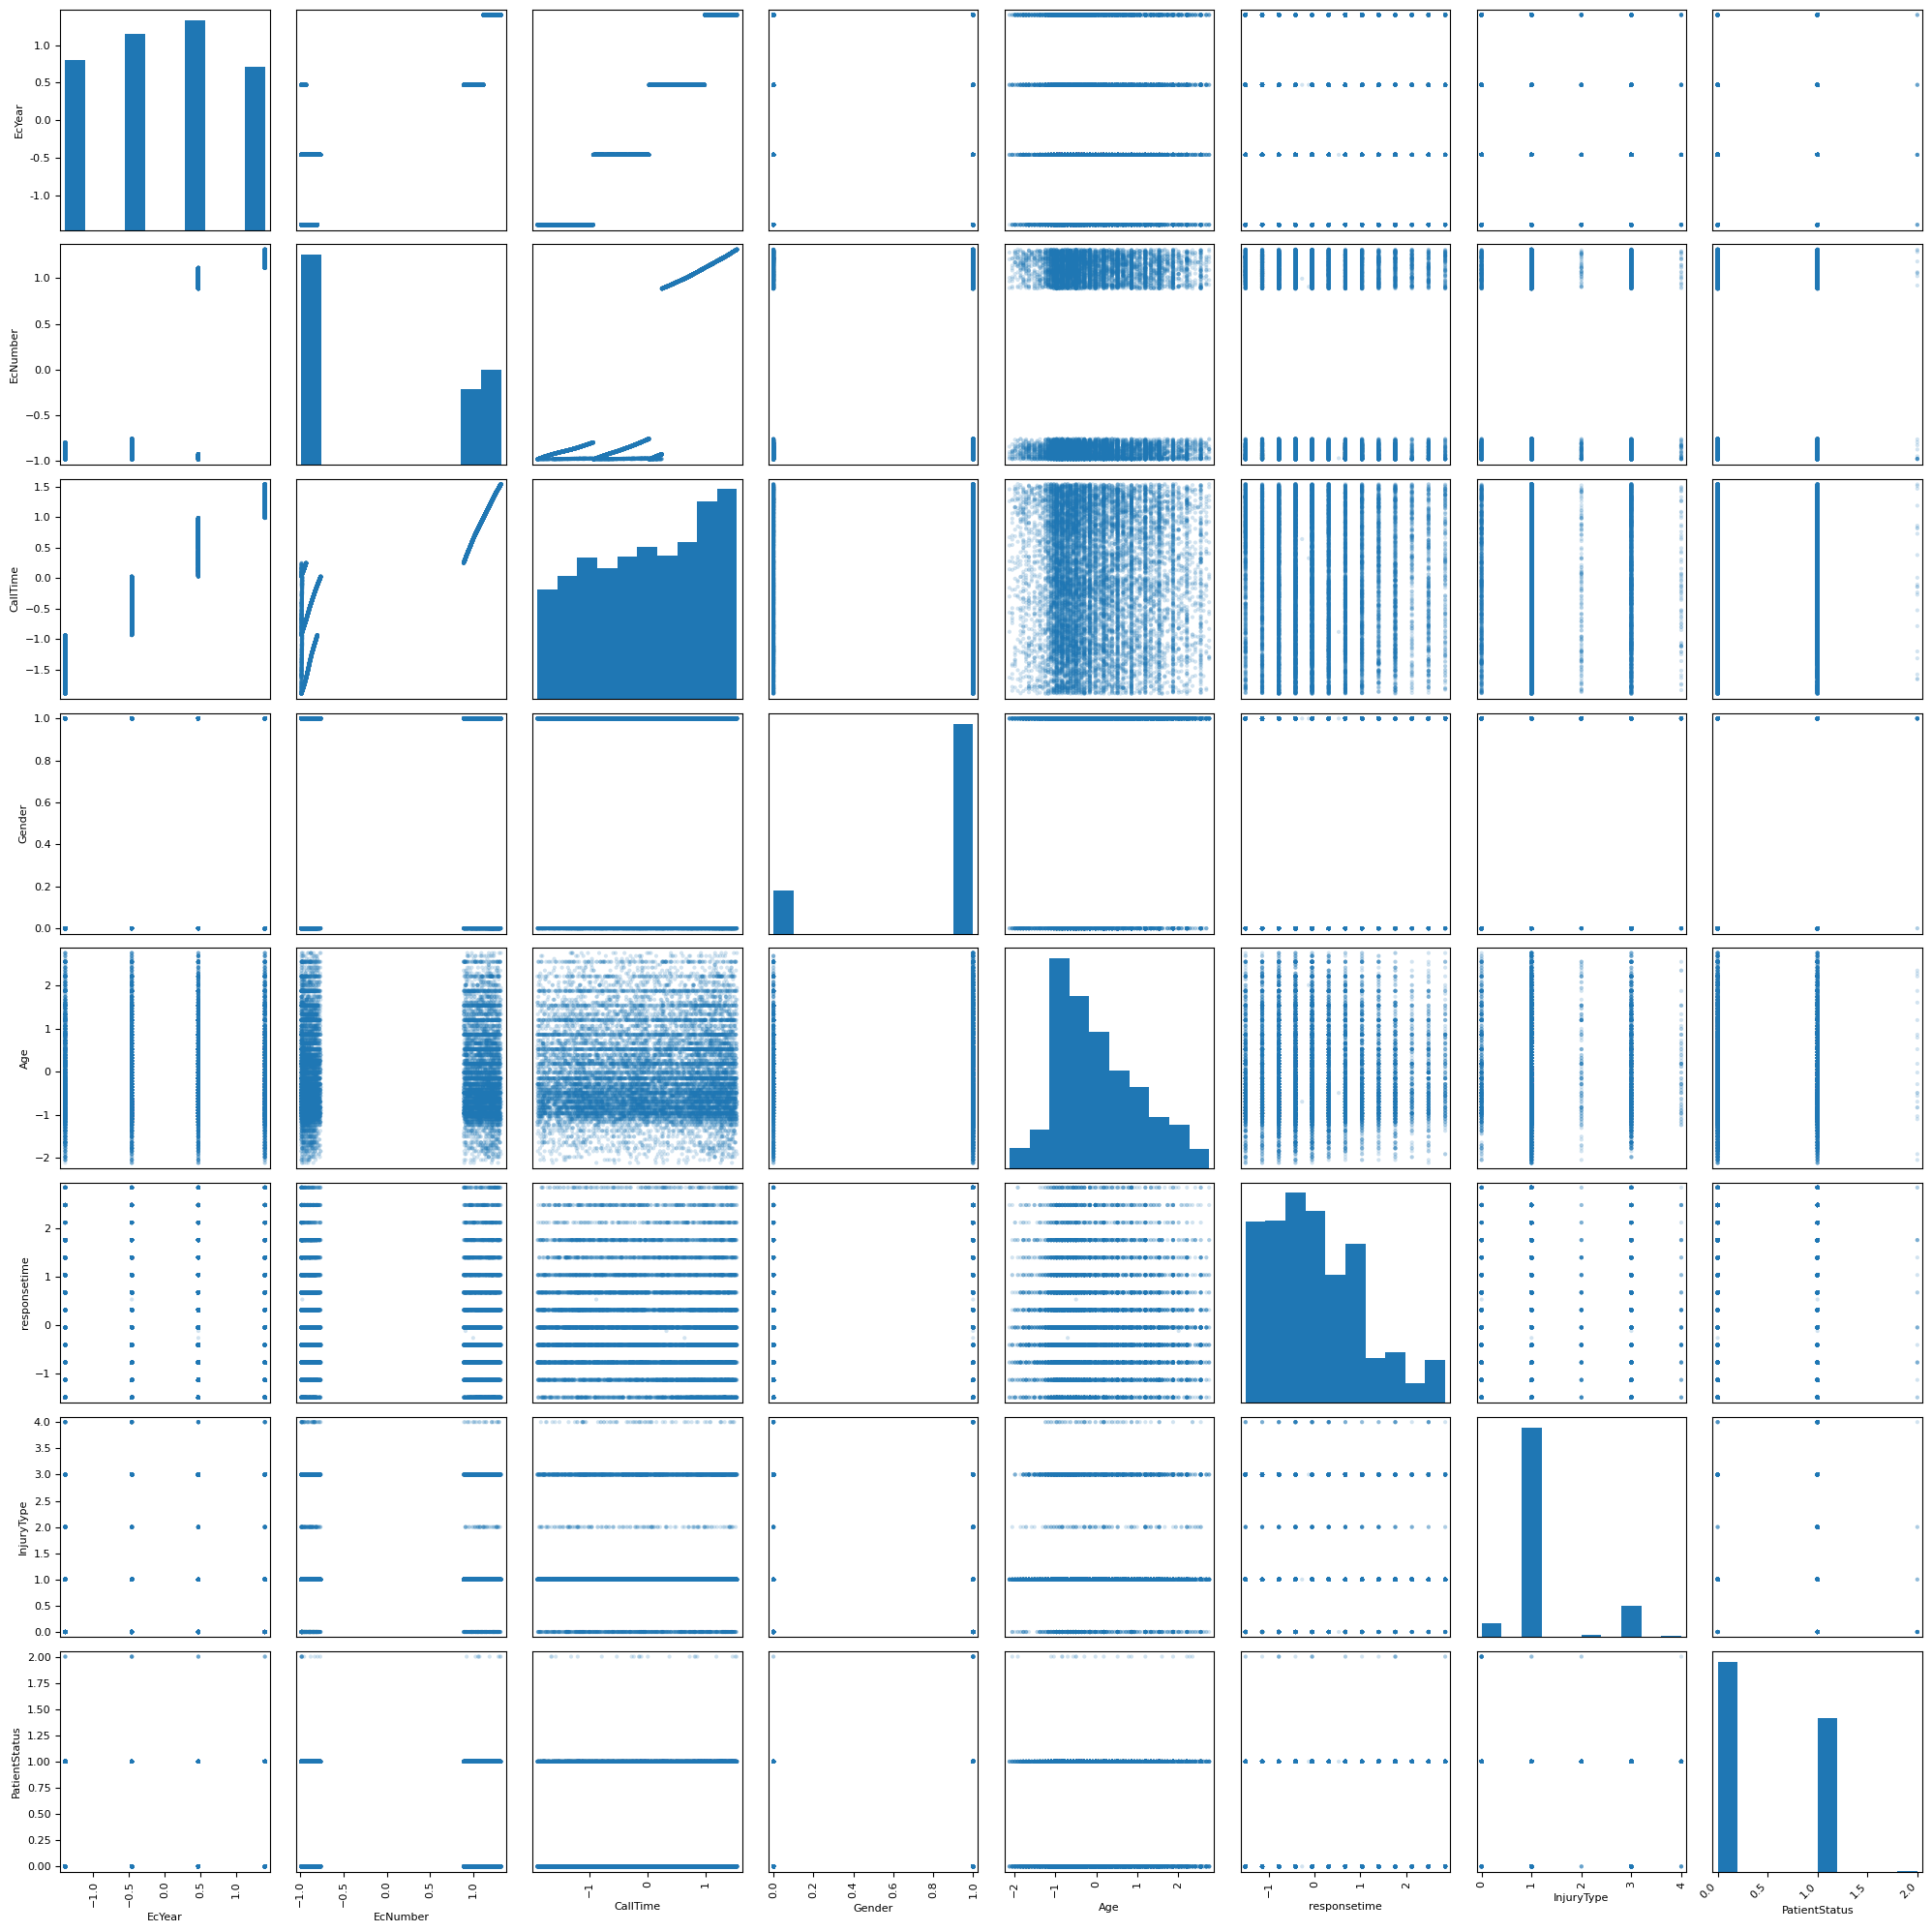

In [60]:
# Filter out constant or near-constant columns
df_cleaned = df_cleaned[numerical_cols_in_corr]
df_cleaned = df_cleaned.loc[:, df_cleaned.var() > 1e-10]

# Create scatter matrix
plt.figure(dpi=150)
plt.rcParams.update({'font.size': 8})
scatter_matrix(df_cleaned, alpha=0.2, figsize=(20, 20), diagonal='hist')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
df_cleaned.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'Gender', 'Age', 'responsetime',
       'InjuryType', 'PatientStatus'],
      dtype='object')

**Generating Heatmap**

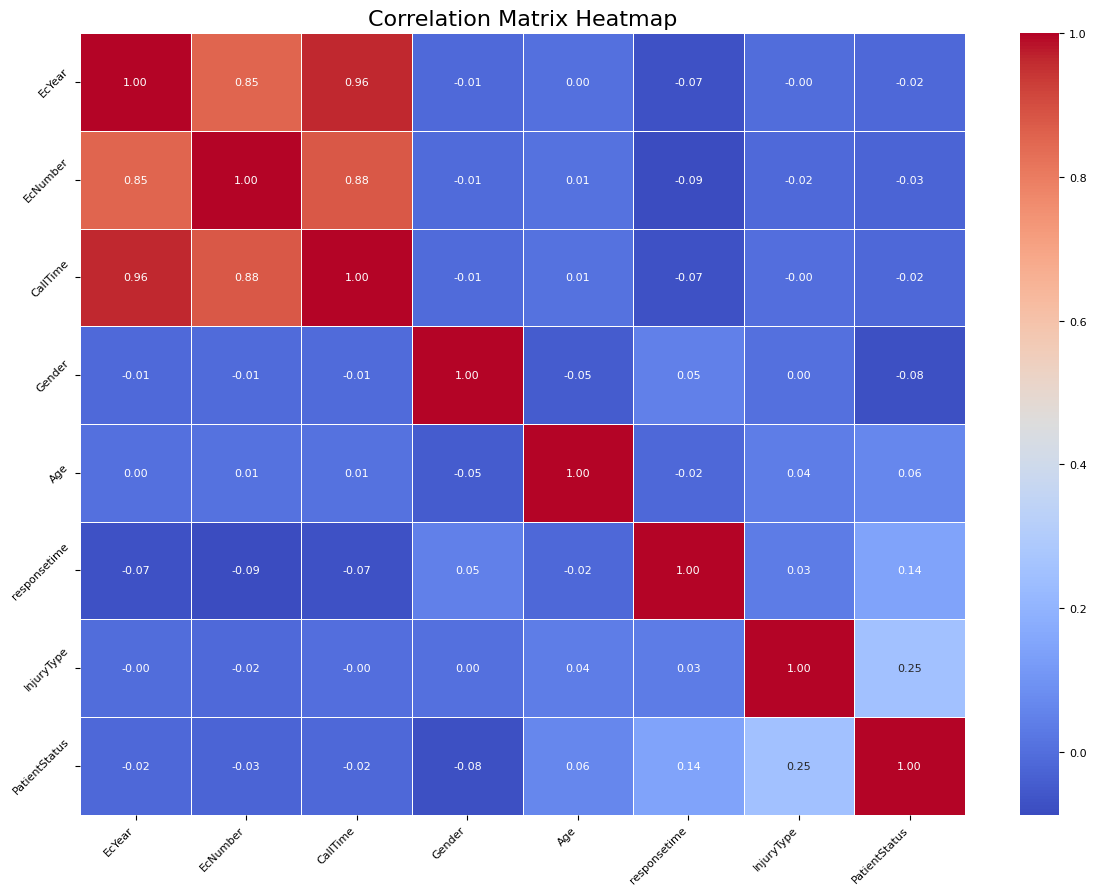

In [62]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
df_cleaned.shape

(14547, 8)

**Dropping highly correlated columns**

In [64]:
def drop_highly_correlated_columns(df_cleaned, corr_matrix, threshold=0.9):
    # Create a set to track columns to drop
    columns_to_drop = set()

    # Iterate through the correlation matrix to find correlated pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                # Arbitrarily choose to drop the second column in the pair
                columns_to_drop.add(colname2)

    # Drop the columns from the cleaned DataFrame
    df_updated = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

    return df_updated, list(columns_to_drop)


# Calculate the correlation matrix for df_cleaned
corr_matrix = df_cleaned.corr()

# Example usage with df_cleaned and corr_matrix
df_updated, dropped_columns = drop_highly_correlated_columns(df_cleaned, corr_matrix)

# Print the dropped columns
print("Dropped columns:", dropped_columns)

# Optionally, display the reduced dataset
print(df_updated.columns)

Dropped columns: ['CallTime']
Index(['EcYear', 'EcNumber', 'Gender', 'Age', 'responsetime', 'InjuryType',
       'PatientStatus'],
      dtype='object')


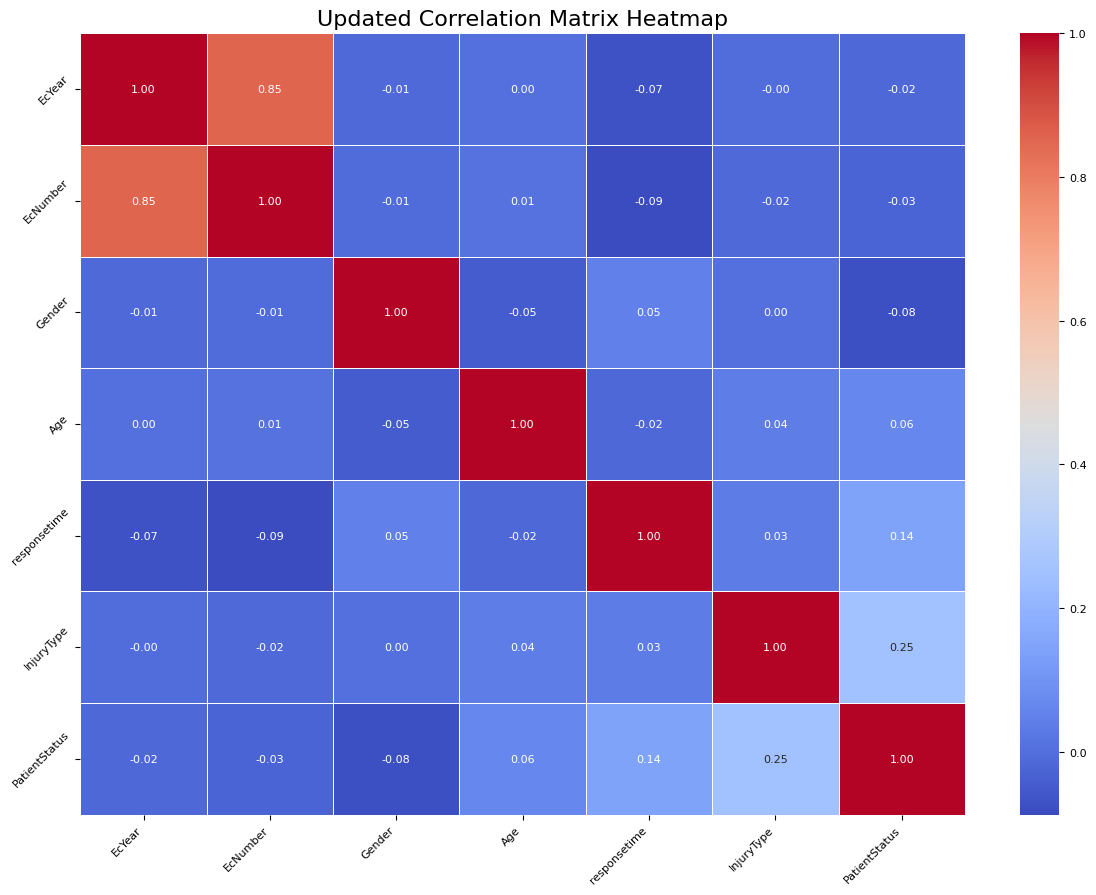

In [65]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_updated.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Updated Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Cleaning the dataset**

In [66]:
# Custom function to clean column names by removing special characters
def clean_column_names(df_updated):
    df_updated.columns = df_updated.columns.str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
    return df_updated

# Function to encode categorical variables using LabelEncoder
def encode_categorical_columns(df_updated):
    # Use LabelEncoder for encoding categorical columns
    label_encoder = LabelEncoder()
    for col in df_updated.select_dtypes(include=['object']).columns:
        df_updated[col] = label_encoder.fit_transform(df_updated[col])
    return df_updated

In [67]:
df_updated.shape

(14547, 7)

# **Splitting Data to Train & Test**

In [68]:
# Split data into training and testing sets for InjuryType
X_injury = df_updated.drop('InjuryType', axis=1)
y_injury = df_updated['InjuryType']
X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(X_injury, y_injury, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Data split:")
print("Training set shape:", X_train_injury.shape)
print("Testing set shape:", X_test_injury.shape)

Data split:
Training set shape: (11637, 6)
Testing set shape: (2910, 6)


In [69]:
# Split data into training and testing sets for PatientStatus
X_patient = df_updated.drop('PatientStatus', axis=1)
y_patient = df_updated['PatientStatus']
X_train_patient, X_test_patient, y_train_patient, y_test_patient = train_test_split(X_patient, y_patient, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Data split:")
print("Training set shape:", X_train_patient.shape)
print("Testing set shape:", X_test_patient.shape)

Data split:
Training set shape: (11637, 6)
Testing set shape: (2910, 6)


In [70]:
def evaluate_model(model, X_train, X_test, y_train, y_test, target_name, store_results=None):
    print(f"\nTraining & Evaluating {model.__class__.__name__} for {target_name}...\n")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    result_dict = {
        'Model': model.__class__.__name__,
        'Target': target_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Initialize or update results storage
    if store_results is None:
        store_results = []
    store_results.append(result_dict)

    # Display results in tabular format
    print("\nSummary of Metrics:")
    print(tabulate([result_dict], headers="keys", tablefmt="grid", showindex=False))

    # Display confusion matrix
    print("\nConfusion Matrix:")
    class_labels = getattr(model, 'classes_', np.unique(y_test))
    print(pd.DataFrame(
        conf_matrix,
        index=[f"True {label}" for label in class_labels],
        columns=[f"Pred {label}" for label in class_labels]
    ))

    return result_dict, store_results


# **Training and Evaluating Logistic Regression Model**

In [71]:
# Define Logistic Regression model configurations and datasets
models = [
    ('InjuryType', LogisticRegression(max_iter=1000, random_state=42),
     X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', LogisticRegression(max_iter=1000, random_state=42),
     X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
log_reg_results_injury = []  # Changed to list
log_reg_results_patient = []  # Changed to list

# Loop through each model and dataset for evaluation
for target_name, model, X_train, X_test, y_train, y_test in models:
    if target_name == 'InjuryType':
        # Store results for InjuryType
        _, log_reg_results_injury = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, log_reg_results_injury)
    elif target_name == 'PatientStatus':
        # Store results for PatientStatus
        _, log_reg_results_patient = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, log_reg_results_patient)

# Combine all results for both InjuryType and PatientStatus into a single DataFrame
log_reg_results_combined = pd.DataFrame(log_reg_results_injury + log_reg_results_patient)

# Display combined results in tabular format
print("\nCombined Logistic Regression Results Across All Targets:")
print(tabulate(log_reg_results_combined, headers="keys", tablefmt="grid", showindex=False))



Training & Evaluating LogisticRegression for InjuryType...


Summary of Metrics:
+--------------------+------------+------------+-------------+----------+------------+
| Model              | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+====================+============+============+=============+==========+============+
| LogisticRegression | InjuryType |   0.809622 |    0.694551 | 0.809622 |   0.726625 |
+--------------------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0       5     156       0       1       0
True 1       1    2351       0       0       0
True 2       1      22       0       0       0
True 3       0     356       0       0       0
True 4       0      17       0       0       0

Training & Evaluating LogisticRegression for PatientStatus...


Summary of Metrics:
+--------------------+---------------+------------+-------------+----------+------------+
| Model

# **Training and Evaluating Decision Tree Model**

In [72]:
# Define Decision Tree model configurations and datasets
models = [
    ('InjuryType', DecisionTreeClassifier(random_state=42),
     X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', DecisionTreeClassifier(random_state=42),
     X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
dec_tree_results_injury = []  # Changed to list
dec_tree_results_patient = []  # Changed to list

# Loop through each model and dataset for evaluation
for target_name, model, X_train, X_test, y_train, y_test in models:
    if target_name == 'InjuryType':
        # Store results for InjuryType
        _, dec_tree_results_injury = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, dec_tree_results_injury)
    elif target_name == 'PatientStatus':
        # Store results for PatientStatus
        _, dec_tree_results_patient = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, dec_tree_results_patient)

# Combine all results for both InjuryType and PatientStatus into a single DataFrame
dec_tree_results_combined = pd.DataFrame(dec_tree_results_injury + dec_tree_results_patient)

# Display combined results in tabular format
print("\nCombined Decision Tree Results Across All Targets:")
print(tabulate(dec_tree_results_combined, headers="keys", tablefmt="grid", showindex=False))



Training & Evaluating DecisionTreeClassifier for InjuryType...


Summary of Metrics:
+------------------------+------------+------------+-------------+----------+------------+
| Model                  | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+========================+============+============+=============+==========+============+
| DecisionTreeClassifier | InjuryType |    0.72543 |    0.736927 |  0.72543 |   0.731027 |
+------------------------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0      29      87       6      39       1
True 1     117    1981      25     216      13
True 2       3      10       2       7       1
True 3      33     216       9      98       0
True 4       1      12       0       3       1

Training & Evaluating DecisionTreeClassifier for PatientStatus...


Summary of Metrics:
+------------------------+---------------+------------+-------------+

# **Training and Evaluating SVM (Support Vector Machine) Model**

In [73]:
# Define SVM model configurations and datasets
models = [
    ('InjuryType', SVC(random_state=42), X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', SVC(random_state=42), X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
svm_results_injury = []  # Changed to list
svm_results_patient = []  # Changed to list

# Loop through each model and dataset for evaluation
for target_name, model, X_train, X_test, y_train, y_test in models:
    if target_name == 'InjuryType':
        # Store results for InjuryType
        _, svm_results_injury = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, svm_results_injury)
    elif target_name == 'PatientStatus':
        # Store results for PatientStatus
        _, svm_results_patient = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, svm_results_patient)

# Combine all results for both InjuryType and PatientStatus into a single DataFrame
svm_results_combined = pd.DataFrame(svm_results_injury + svm_results_patient)

# Display combined results in tabular format
print("\nCombined SVM Results Across All Targets:")
print(tabulate(svm_results_combined, headers="keys", tablefmt="grid", showindex=False))



Training & Evaluating SVC for InjuryType...


Summary of Metrics:
+---------+------------+------------+-------------+----------+------------+
| Model   | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+=========+============+============+=============+==========+============+
| SVC     | InjuryType |   0.808247 |    0.653264 | 0.808247 |   0.722538 |
+---------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0       0     162       0       0       0
True 1       0    2352       0       0       0
True 2       0      23       0       0       0
True 3       0     356       0       0       0
True 4       0      17       0       0       0

Training & Evaluating SVC for PatientStatus...


Summary of Metrics:
+---------+---------------+------------+-------------+----------+------------+
| Model   | Target        |   Accuracy |   Precision |   Recall |   F1 Score |
+=========+=============

# **Training and Evaluating Random Forest Model**

In [74]:
# Define Random Forest model configurations and datasets
models = [
    ('InjuryType', RandomForestClassifier(n_estimators=100, random_state=42),
     X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', RandomForestClassifier(n_estimators=100, random_state=42),
     X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
rf_results_injury = []
rf_results_patient = []

# Loop through each model and dataset for evaluation
for target_name, model, X_train, X_test, y_train, y_test in models:
    if target_name == 'InjuryType':
        # Store results for InjuryType
        _, rf_results_injury = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, rf_results_injury)
    elif target_name == 'PatientStatus':
        # Store results for PatientStatus
        _, rf_results_patient = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, rf_results_patient)

# Combine all results for both InjuryType and PatientStatus into a single DataFrame
rf_results_combined = pd.DataFrame(rf_results_injury + rf_results_patient)

# Display combined results in tabular format
print("\nCombined Random Forest Results Across All Targets:")
print(tabulate(rf_results_combined, headers="keys", tablefmt="grid", showindex=False))



Training & Evaluating RandomForestClassifier for InjuryType...


Summary of Metrics:
+------------------------+------------+------------+-------------+----------+------------+
| Model                  | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+========================+============+============+=============+==========+============+
| RandomForestClassifier | InjuryType |   0.778007 |    0.719215 | 0.778007 |   0.743133 |
+------------------------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0      16     119       0      26       1
True 1      47    2196       6     102       1
True 2       2      15       0       6       0
True 3      17     287       0      52       0
True 4       0      13       0       4       0

Training & Evaluating RandomForestClassifier for PatientStatus...


Summary of Metrics:
+------------------------+---------------+------------+-------------+

# **Training and Evaluating XGBoost Model**

In [75]:
# Define XGBoost model configurations and datasets
models = [
    ('InjuryType', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
     X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
     X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
xgboost_results_injury = []
xgboost_results_patient = []

# Loop through each model and dataset for evaluation
for target_name, model, X_train, X_test, y_train, y_test in models:
    if target_name == 'InjuryType':
        # Store results for InjuryType
        _, xgboost_results_injury = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, xgboost_results_injury)
    elif target_name == 'PatientStatus':
        # Store results for PatientStatus
        _, xgboost_results_patient = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, xgboost_results_patient)

# Combine all results for both InjuryType and PatientStatus into a single DataFrame
xgboost_results_combined = pd.DataFrame(xgboost_results_injury + xgboost_results_patient)

# Display combined results in tabular format
print("\nCombined XGBoost Results Across All Targets:")
print(tabulate(xgboost_results_combined, headers="keys", tablefmt="grid", showindex=False))



Training & Evaluating XGBClassifier for InjuryType...


Summary of Metrics:
+---------------+------------+------------+-------------+----------+------------+
| Model         | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+===============+============+============+=============+==========+============+
| XGBClassifier | InjuryType |   0.797595 |    0.730888 | 0.797595 |   0.745627 |
+---------------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0      11     131       0      20       0
True 1       9    2271       0      72       0
True 2       2      19       1       1       0
True 3       3     314       1      38       0
True 4       0      16       0       1       0

Training & Evaluating XGBClassifier for PatientStatus...


Summary of Metrics:
+---------------+---------------+------------+-------------+----------+------------+
| Model         | Target        |   Accuracy | 

# **Training and Evaluating AdaBoost Model**

In [76]:
# Define AdaBoost model configurations and datasets
models = [
    ('InjuryType', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
     X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
     X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
adaboost_results_injury = []
adaboost_results_patient = []

# Loop through each model and dataset for evaluation
for target_name, model, X_train, X_test, y_train, y_test in models:
    if target_name == 'InjuryType':
        # Store results for InjuryType
        _, adaboost_results_injury = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, adaboost_results_injury)
    elif target_name == 'PatientStatus':
        # Store results for PatientStatus
        _, adaboost_results_patient = evaluate_model(model, X_train, X_test, y_train, y_test, target_name, adaboost_results_patient)

# Combine all results for both InjuryType and PatientStatus into a single DataFrame
adaboost_results_combined = pd.DataFrame(adaboost_results_injury + adaboost_results_patient)

# Display combined results in tabular format
print("\nCombined AdaBoost Results Across All Targets:")
print(tabulate(adaboost_results_combined, headers="keys", tablefmt="grid", showindex=False))



Training & Evaluating AdaBoostClassifier for InjuryType...


Summary of Metrics:
+--------------------+------------+------------+-------------+----------+------------+
| Model              | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+====================+============+============+=============+==========+============+
| AdaBoostClassifier | InjuryType |   0.799313 |    0.718999 | 0.799313 |   0.731143 |
+--------------------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0       6     149       3       4       0
True 1       3    2308      16      25       0
True 2       1      20       0       2       0
True 3       3     337       4      12       0
True 4       0      16       1       0       0

Training & Evaluating AdaBoostClassifier for PatientStatus...


Summary of Metrics:
+--------------------+---------------+------------+-------------+----------+------------+
| Model

# **Comparison Table for All The Models**

In [77]:
def generate_comparison_table(model_results, target_name):
    # Convert list of results into a DataFrame
    target_results_df = pd.DataFrame(model_results)
    target_results_df['Model'] = target_name  # Add a column for the model name
    return target_results_df

# Combine results for all models
results_injury = {
    'Logistic Regression': log_reg_results_injury,
    'Decision Tree': dec_tree_results_injury,
    'SVM': svm_results_injury,
    'Random Forest': rf_results_injury,
    'XGBoost': xgboost_results_injury,
    'AdaBoost': adaboost_results_injury
}

results_patient = {
    'Logistic Regression': log_reg_results_patient,
    'Decision Tree': dec_tree_results_patient,
    'SVM': svm_results_patient,
    'Random Forest': rf_results_patient,
    'XGBoost': xgboost_results_patient,
    'AdaBoost': adaboost_results_patient
}

# Generate comparison tables for InjuryType and PatientStatus
injurytype_comparison = []
patientstatus_comparison = []

# Generate InjuryType comparison
for model_name, result_data in results_injury.items():
    # Add a column indicating the model name
    injurytype_df = generate_comparison_table(result_data, model_name)
    injurytype_comparison.append(injurytype_df)

# Generate PatientStatus comparison
for model_name, result_data in results_patient.items():
    # Add a column indicating the model name
    patientstatus_df = generate_comparison_table(result_data, model_name)
    patientstatus_comparison.append(patientstatus_df)

# Combine all tables for InjuryType and PatientStatus
injurytype_comparison_df = pd.concat(injurytype_comparison, ignore_index=True)
patientstatus_comparison_df = pd.concat(patientstatus_comparison, ignore_index=True)

# Print comparison tables
print("\nComparison Table for InjuryType:")
print(tabulate(injurytype_comparison_df, headers="keys", tablefmt="grid", showindex=False))

print("\nComparison Table for PatientStatus:")
print(tabulate(patientstatus_comparison_df, headers="keys", tablefmt="grid", showindex=False))



Comparison Table for InjuryType:
+---------------------+------------+------------+-------------+----------+------------+
| Model               | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+============+=============+==========+============+
| Logistic Regression | InjuryType |   0.809622 |    0.694551 | 0.809622 |   0.726625 |
+---------------------+------------+------------+-------------+----------+------------+
| Decision Tree       | InjuryType |   0.72543  |    0.736927 | 0.72543  |   0.731027 |
+---------------------+------------+------------+-------------+----------+------------+
| SVM                 | InjuryType |   0.808247 |    0.653264 | 0.808247 |   0.722538 |
+---------------------+------------+------------+-------------+----------+------------+
| Random Forest       | InjuryType |   0.778007 |    0.719215 | 0.778007 |   0.743133 |
+---------------------+------------+------------+-------------+----------+------------

# **Code Improvement**

In [78]:
# Feature Engineering function
def feature_engineering(df_updated):
    # Combine 'EcYear' and 'EcNumber' into a new feature 'EcYear_EcNumber'
    df_updated['EcYear_EcNumber'] = df_updated['EcYear'] + df_updated['EcNumber']

    # Drop the original 'EcYear' and 'EcNumber' columns
    FE = df_updated.drop(['EcYear', 'EcNumber'], axis=1)

    return FE

# Apply feature engineering on the training data for InjuryType
X_train_injury_fe = feature_engineering(X_train_injury)

# Display the feature-engineered training data for InjuryType
print("Feature engineered training data for InjuryType:\n", X_train_injury_fe.head())

# Apply feature engineering on the training data for PatientStatus
X_train_patient_fe = feature_engineering(X_train_patient)

# Display the feature-engineered training data for PatientStatus
print("\nFeature engineered training data for PatientStatus:\n", X_train_patient_fe.head())

# Feature Engineering on Test Data
X_test_injury_fe = feature_engineering(X_test_injury)
X_test_patient_fe = feature_engineering(X_test_patient)

Feature engineered training data for InjuryType:
        Gender       Age  responsetime  PatientStatus  EcYear_EcNumber
29464       1 -1.304218     -0.416453              0         1.463357
11249       1  2.686866     -0.779504              1        -2.377412
32393       1 -0.965991     -0.053403              0         1.392214
5316        1  2.213347     -0.053403              0        -2.290201
31374       1 -1.033636     -0.053403              0         1.414299

Feature engineered training data for PatientStatus:
        Gender       Age  responsetime  InjuryType  EcYear_EcNumber
29464       1 -1.304218     -0.416453           1         1.463357
11249       1  2.686866     -0.779504           0        -2.377412
32393       1 -0.965991     -0.053403           1         1.392214
5316        1  2.213347     -0.053403           1        -2.290201
31374       1 -1.033636     -0.053403           1         1.414299


**Balancing the data using SMOTE**

In [79]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the feature-engineered data for InjuryType
X_resampled_injury_fe, y_resampled_injury = smote.fit_resample(X_train_injury_fe, y_train_injury)

# Display the new class distribution for InjuryType
print("Class distribution after SMOTE for InjuryType (Feature Engineered):\n", y_resampled_injury.value_counts())

# Apply SMOTE to the feature-engineered data for PatientStatus
X_resampled_patient_fe, y_resampled_patient = smote.fit_resample(X_train_patient_fe, y_train_patient)

# Display the new class distribution for PatientStatus
print("\nClass distribution after SMOTE for PatientStatus (Feature Engineered):\n", y_resampled_patient.value_counts())

Class distribution after SMOTE for InjuryType (Feature Engineered):
 InjuryType
1    9439
0    9439
3    9439
4    9439
2    9439
Name: count, dtype: int64

Class distribution after SMOTE for PatientStatus (Feature Engineered):
 PatientStatus
0    6725
1    6725
2    6725
Name: count, dtype: int64


In [80]:
# Initialize PolynomialFeatures separately for each target
poly_injury = PolynomialFeatures(degree=2, include_bias=False)
poly_patient = PolynomialFeatures(degree=2, include_bias=False)

# Fit-transform PolynomialFeatures for InjuryType (on resampled data)
X_resampled_injury_poly = poly_injury.fit_transform(X_resampled_injury_fe)
X_resampled_patient_poly = poly_patient.fit_transform(X_resampled_patient_fe)

# Display the shapes of the transformed feature sets
print("Shape of Polynomial Features for InjuryType (resampled):", X_resampled_injury_poly.shape)
print("Shape of Polynomial Features for PatientStatus (resampled):", X_resampled_patient_poly.shape)

# Apply Polynomial Features to the test data using the fitted transformers
X_test_injury_poly = poly_injury.transform(X_test_injury_fe)
X_test_patient_poly = poly_patient.transform(X_test_patient_fe)

# Display the shapes of the transformed test feature sets
print("Shape of Polynomial Features for InjuryType (test):", X_test_injury_poly.shape)
print("Shape of Polynomial Features for PatientStatus (test):", X_test_patient_poly.shape)

Shape of Polynomial Features for InjuryType (resampled): (47195, 20)
Shape of Polynomial Features for PatientStatus (resampled): (20175, 20)
Shape of Polynomial Features for InjuryType (test): (2910, 20)
Shape of Polynomial Features for PatientStatus (test): (2910, 20)


In [81]:
# Initialize dictionaries to store results for InjuryType_FE and PatientStatus_FE
store_results_injury_fe = []
store_results_patient_fe = []

# Define the models to be used
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Training and Evaluating Models for InjuryType_FE
for model_name, model in models:
    # Fit model to resampled InjuryType_FE data
    model.fit(X_resampled_injury_fe, y_resampled_injury)

    # Evaluate the model
    results, store_results_injury_fe = evaluate_model(
        model, X_resampled_injury_fe, X_test_injury_fe, y_resampled_injury, y_test_injury,
        'InjuryType_FE', store_results_injury_fe
    )

# Training and Evaluating Models for PatientStatus_FE
for model_name, model in models:
    # Fit model to resampled PatientStatus_FE data
    model.fit(X_resampled_patient_fe, y_resampled_patient)

    # Evaluate the model
    results, store_results_patient_fe = evaluate_model(
        model, X_resampled_patient_fe, X_test_patient_fe, y_resampled_patient, y_test_patient,
        'PatientStatus_FE', store_results_patient_fe
    )

# Convert result lists to DataFrames
fe_injury_results_df = pd.DataFrame(store_results_injury_fe)
fe_patient_results_df = pd.DataFrame(store_results_patient_fe)

# Combine the DataFrames
fe_results_combined = pd.concat([fe_injury_results_df, fe_patient_results_df], ignore_index=True)

# Display combined results in tabular format
print("\nCombined Results Across All Targets (Feature Engineered):")
print(tabulate(fe_results_combined, headers="keys", tablefmt="grid", showindex=False))




Training & Evaluating LogisticRegression for InjuryType_FE...


Summary of Metrics:
+--------------------+---------------+------------+-------------+----------+------------+
| Model              | Target        |   Accuracy |   Precision |   Recall |   F1 Score |
+====================+===============+============+=============+==========+============+
| LogisticRegression | InjuryType_FE |   0.586254 |     0.81856 | 0.586254 |   0.679887 |
+--------------------+---------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0      24       3      58      38      39
True 1     118    1610     262     196     166
True 2       2       1       7       6       7
True 3      63      37     134      60      62
True 4       4       1       5       2       5

Training & Evaluating DecisionTreeClassifier for InjuryType_FE...


Summary of Metrics:
+------------------------+---------------+------------+-------------+------

In [82]:
# Initialize store_results for InjuryType (Polynomial)
store_results_injury_poly = []
store_results_patient_poly = []

# Define the models to be used
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Training and Evaluating Models for InjuryType (Polynomial Features)
for model_name, model in models:
    # Fit model to resampled InjuryType (Polynomial) data
    model.fit(X_resampled_injury_poly, y_resampled_injury)

    # Evaluate the model
    results, store_results_injury_poly = evaluate_model(
        model, X_resampled_injury_poly, X_test_injury_poly, y_resampled_injury, y_test_injury,
        'InjuryType_Poly', store_results_injury_poly
    )

# Training and Evaluating Models for PatientStatus (Polynomial Features)
for model_name, model in models:
    # Fit model to resampled PatientStatus (Polynomial) data
    model.fit(X_resampled_patient_poly, y_resampled_patient)

    # Evaluate the model
    results, store_results_patient_poly = evaluate_model(
        model, X_resampled_patient_poly, X_test_patient_poly, y_resampled_patient, y_test_patient,
        'PatientStatus_Poly', store_results_patient_poly
    )

# Convert result lists to DataFrames
poly_injury_results_df = pd.DataFrame(store_results_injury_poly)
poly_patient_results_df = pd.DataFrame(store_results_patient_poly)

# Combine the DataFrames
poly_results_combined = pd.concat([poly_injury_results_df, poly_patient_results_df], ignore_index=True)

# Display combined results in tabular format
print("\nCombined Results Across All Targets (Feature Engineered):")
print(tabulate(poly_results_combined, headers="keys", tablefmt="grid", showindex=False))




Training & Evaluating LogisticRegression for InjuryType_Poly...


Summary of Metrics:
+--------------------+-----------------+------------+-------------+----------+------------+
| Model              | Target          |   Accuracy |   Precision |   Recall |   F1 Score |
+====================+=================+============+=============+==========+============+
| LogisticRegression | InjuryType_Poly |   0.584536 |    0.828111 | 0.584536 |   0.681279 |
+--------------------+-----------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0      41       2      45      35      39
True 1     139    1577     222     183     231
True 2       5       1       6       6       5
True 3      53      35     123      73      72
True 4       7       1       3       2       4

Training & Evaluating DecisionTreeClassifier for InjuryType_Poly...


Summary of Metrics:
+------------------------+-----------------+------------+----

In [83]:
combined_results_injury = pd.concat([injurytype_comparison_df, fe_injury_results_df, poly_injury_results_df], ignore_index=True)
combined_results_patient = pd.concat([patientstatus_comparison_df, fe_patient_results_df, poly_patient_results_df], ignore_index=True)

print('\n Original vs FeatureEngineered vs Poly (InjuryType):')
print(tabulate(combined_results_injury, headers="keys", tablefmt="grid", showindex=False))

print('\n Original vs FeatureEngineered vs Poly (PatientStatus):')
print(tabulate(combined_results_patient, headers="keys", tablefmt="grid", showindex=False))



 Original vs FeatureEngineered vs Poly (InjuryType):
+------------------------+-----------------+------------+-------------+----------+------------+
| Model                  | Target          |   Accuracy |   Precision |   Recall |   F1 Score |
+========================+=================+============+=============+==========+============+
| Logistic Regression    | InjuryType      |   0.809622 |    0.694551 | 0.809622 |   0.726625 |
+------------------------+-----------------+------------+-------------+----------+------------+
| Decision Tree          | InjuryType      |   0.72543  |    0.736927 | 0.72543  |   0.731027 |
+------------------------+-----------------+------------+-------------+----------+------------+
| SVM                    | InjuryType      |   0.808247 |    0.653264 | 0.808247 |   0.722538 |
+------------------------+-----------------+------------+-------------+----------+------------+
| Random Forest          | InjuryType      |   0.778007 |    0.719215 | 0.778007 |

# HyperParameter Tuning

**Scaling & Resampling the dataset for hyperparameter tuning**

In [84]:
# Create MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the training data (for scaling features)
X_train_injury_scaled = scaler.fit_transform(X_train_injury)
X_test_injury_scaled = scaler.transform(X_test_injury)

X_train_patient_scaled = scaler.fit_transform(X_train_patient)
X_test_patient_scaled = scaler.transform(X_test_patient)

# Print the shapes of scaled data
print("Scaled InjuryType Training set shape:", X_train_injury_scaled.shape)
print("Scaled InjuryType Testing set shape:", X_test_injury_scaled.shape)

print("Scaled PatientStatus Training set shape:", X_train_patient_scaled.shape)
print("Scaled PatientStatus Testing set shape:", X_test_patient_scaled.shape)

# Apply SMOTE to balance the class distribution (InjuryType)
smote_injury = SMOTE(random_state=42)
X_train_injury_resampled, y_train_injury_resampled = smote_injury.fit_resample(X_train_injury_scaled, y_train_injury)

# Apply SMOTE to balance the class distribution (PatientStatus)
smote_patient = SMOTE(random_state=42)
X_train_patient_resampled, y_train_patient_resampled = smote_patient.fit_resample(X_train_patient_scaled, y_train_patient)

# Print the new class distributions after SMOTE
print("\nClass distribution after SMOTE (InjuryType):")
print(f"Training set class distribution: {y_train_injury_resampled.value_counts()}")

print("\nClass distribution after SMOTE (PatientStatus):")
print(f"Training set class distribution: {y_train_patient_resampled.value_counts()}")


Scaled InjuryType Training set shape: (11637, 7)
Scaled InjuryType Testing set shape: (2910, 7)
Scaled PatientStatus Training set shape: (11637, 7)
Scaled PatientStatus Testing set shape: (2910, 7)

Class distribution after SMOTE (InjuryType):
Training set class distribution: InjuryType
1    9439
0    9439
3    9439
4    9439
2    9439
Name: count, dtype: int64

Class distribution after SMOTE (PatientStatus):
Training set class distribution: PatientStatus
0    6725
1    6725
2    6725
Name: count, dtype: int64


**Function for the Hyperparameter Tuning**

In [85]:
# Function to tune hyperparameters
def tune_hyperparameters(model, param_grid, X_train, y_train, search_type='grid'):
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
    elif search_type == 'random':
        search = RandomizedSearchCV(model, param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

    # Fit the search object
    search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = search.best_estimator_
    best_params = search.best_params_
    best_score = search.best_score_

    return best_params, best_score, best_model


**Setting the hyperparameters**

In [88]:
# Logistic Regression (Grid Search)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Decision Tree (Grid Search)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Support Vector Classifier (Randomized Search)
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'],
    'probability' : [True]
}

# Random Forest (Grid Search)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# XGBoost (Grid Search)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# AdaBoost (Randomized Search)
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'algorithm': ['SAMME', 'SAMME.R']
}


**Setting up the Models & Grids**

In [89]:
# Models and Parameter Grids
models_and_grids = [
    {'model': LogisticRegression(),
     'param_grid': param_grid_lr, 'name': 'Logistic Regression', 'search_type': 'grid'},
    {'model': DecisionTreeClassifier(),
     'param_grid': param_grid_dt, 'name': 'Decision Tree', 'search_type': 'grid'},
    {'model': SVC(),
     'param_grid': param_grid_svc, 'name': 'SVC', 'search_type': 'random'},
    {'model': RandomForestClassifier(),
     'param_grid': param_grid_rf, 'name': 'Random Forest', 'search_type': 'grid'},
    {'model': XGBClassifier(),
     'param_grid': param_grid_xgb, 'name': 'XGBoost', 'search_type': 'grid'},
    {'model': AdaBoostClassifier(),
     'param_grid': param_grid_ab, 'name': 'AdaBoost', 'search_type': 'random'},
]


**Specifying the tasks to be completed**

In [90]:
tasks = [
    {'task_name': 'InjuryType',
     'X_train': X_train_injury_resampled, 'y_train': y_train_injury_resampled},
    {'task_name': 'PatientStatus',
     'X_train': X_train_patient_resampled, 'y_train': y_train_patient_resampled},
]


**Initiating HyperParameter Tuning & Storing the Best Results & Parameters**

In [91]:
# Hyperparameter Tuning Function
def tune_and_store_results(models_and_grids, tasks):
    hypertuned_models = {'InjuryType': {}, 'PatientStatus': {}}

    for task in tasks:
        task_name = task['task_name']
        for entry in models_and_grids:
            model_name = entry['name']
            print(f"\nTuning {model_name} for {task_name} using {entry['search_type']} search...")

            # Perform hyperparameter tuning and cross-validation
            best_params, best_score, best_model = tune_hyperparameters(
                model=entry['model'],
                param_grid=entry['param_grid'],
                X_train=task['X_train'],
                y_train=task['y_train'],
                search_type=entry['search_type']
            )

            print(f"Best Parameters: {best_params}")
            print(f"Best Cross-Validation Score: {best_score}")

            # Store the best model
            hypertuned_models[task_name][model_name] = {
                'model': best_model,
                'best_params': best_params,
                'cv_score': best_score
            }

    return hypertuned_models

# Execute Hyperparameter Tuning
hypertuned_models = tune_and_store_results(models_and_grids, tasks)



Tuning Logistic Regression for InjuryType using grid search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.3933467528339866

Tuning Decision Tree for InjuryType using grid search...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Score: 0.8404703888123741

Tuning SVC for InjuryType using random search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'probability': True, 'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best Cross-Validation Score: 0.5607585549316665

Tuning Random Forest for InjuryType using grid search...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_spli

**Evaluating the Best Parameters**

In [92]:
# Evaluate all hypertuned models
def evaluate_hypertuned_models(hypertuned_models):
    # Store results separately for InjuryType and PatientStatus
    evaluation_results = {'InjuryType': [], 'PatientStatus': []}

    # Iterate through each task: InjuryType and PatientStatus
    tasks = {
        'InjuryType': {
            'X_train': X_train_injury_resampled,
            'X_test': X_test_injury_scaled,
            'y_train': y_train_injury_resampled,
            'y_test': y_test_injury,
        },
        'PatientStatus': {
            'X_train': X_train_patient_resampled,
            'X_test': X_test_patient_scaled,
            'y_train': y_train_patient_resampled,
            'y_test': y_test_patient,
        }
    }

    for task_name, task_data in tasks.items():
        X_train, X_test = task_data['X_train'], task_data['X_test']
        y_train, y_test = task_data['y_train'], task_data['y_test']

        # Iterate through each hypertuned model for the current task
        for model_name, data in hypertuned_models[task_name].items():
            print(f"\nEvaluating {model_name}_Hypertuned for {task_name}...")

            # Extract the pre-trained best model
            best_model = data['model']

            # Evaluate the model using your `evaluate_model` function
            _, task_results = evaluate_model(
                model=best_model,
                X_train=X_train,
                X_test=X_test,
                y_train=y_train,
                y_test=y_test,
                target_name=task_name,
                store_results=evaluation_results[task_name]
            )

            # Update results for this task
            evaluation_results[task_name] = task_results

    return evaluation_results

# Execute Evaluation
evaluation_results = evaluate_hypertuned_models(hypertuned_models)

# Convert Results to DataFrames for Better Visualization
hypertuned_injury_df = pd.DataFrame(evaluation_results['InjuryType'])
hypertuned_patient_df = pd.DataFrame(evaluation_results['PatientStatus'])

# Print Results in Tabular Format
print("\nFinal Evaluation Results (InjuryType):")
print(tabulate(hypertuned_injury_df, headers="keys", tablefmt="grid", showindex=False))

print("\nFinal Evaluation Results (PatientStatus):")
print(tabulate(hypertuned_patient_df, headers="keys", tablefmt="grid", showindex=False))



Evaluating Logistic Regression_Hypertuned for InjuryType...

Training & Evaluating LogisticRegression for InjuryType...


Summary of Metrics:
+--------------------+------------+------------+-------------+----------+------------+
| Model              | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+====================+============+============+=============+==========+============+
| LogisticRegression | InjuryType |   0.592784 |    0.826012 | 0.592784 |   0.687284 |
+--------------------+------------+------------+-------------+----------+------------+

Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0      19       3      63      35      42
True 1      88    1619     294     177     174
True 2       1       1       8       6       7
True 3      33      37     139      74      73
True 4       2       1       5       4       5

Evaluating Decision Tree_Hypertuned for InjuryType...

Training & Evaluating DecisionTreeClassifier for InjuryType...




**Comparison Table with the Initial Model**

In [93]:
conc_results_injury = pd.concat([injurytype_comparison_df, hypertuned_injury_df], ignore_index=True)
conc_results_patient = pd.concat([patientstatus_comparison_df, hypertuned_patient_df], ignore_index=True)

print('\n Original vs Hypertuned (InjuryType):')
print(tabulate(conc_results_injury, headers="keys", tablefmt="grid", showindex=False))

print('\n Original vs Hypertuned (PatientStatus):')
print(tabulate(conc_results_patient, headers="keys", tablefmt="grid", showindex=False))



 Original vs Hypertuned (InjuryType):
+------------------------+------------+------------+-------------+----------+------------+
| Model                  | Target     |   Accuracy |   Precision |   Recall |   F1 Score |
+========================+============+============+=============+==========+============+
| Logistic Regression    | InjuryType |   0.809622 |    0.694551 | 0.809622 |   0.726625 |
+------------------------+------------+------------+-------------+----------+------------+
| Decision Tree          | InjuryType |   0.72543  |    0.736927 | 0.72543  |   0.731027 |
+------------------------+------------+------------+-------------+----------+------------+
| SVM                    | InjuryType |   0.808247 |    0.653264 | 0.808247 |   0.722538 |
+------------------------+------------+------------+-------------+----------+------------+
| Random Forest          | InjuryType |   0.778007 |    0.719215 | 0.778007 |   0.743133 |
+------------------------+------------+------------

In [94]:
def evaluate_on_test_data(models, tasks):
    evaluation_results = {}

    for task_name, data in tasks.items():
        print(f"\nEvaluating models for {task_name}...")

        X_test, y_test = data['X_test'], data['y_test']
        task_results = {}

        for model_name, model_data in models[task_name].items():
            # Extract the actual model
            model = model_data['model']

            print(f"\nEvaluating {model_name}...")
            y_pred = model.predict(X_test)

            # Compute evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            report = classification_report(y_test, y_pred, zero_division=0)
            confusion = confusion_matrix(y_test, y_pred)

            # Display metrics
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print("Classification Report:\n", report)
            print("Confusion Matrix:\n", confusion)

            # Store results
            task_results[model_name] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'Confusion Matrix': confusion
            }

        # Save task-specific results
        evaluation_results[task_name] = task_results

    return evaluation_results


# Define the tasks with corresponding test data
tasks = {
    'InjuryType': {
        'X_test': X_test_injury,
        'y_test': y_test_injury,
    },
    'PatientStatus': {
        'X_test': X_test_patient,
        'y_test': y_test_patient,
    }
}

# Evaluate the hypertuned models
test_results = evaluate_on_test_data(hypertuned_models, tasks)

# Display results in a structured way
for task_name, results in test_results.items():
    print(f"\nEvaluation Results for {task_name}:")
    for model_name, metrics in results.items():
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Precision: {metrics['Precision']:.4f}")
        print(f"Recall: {metrics['Recall']:.4f}")
        print(f"F1-Score: {metrics['F1-Score']:.4f}")
        print("Confusion Matrix:\n", metrics['Confusion Matrix'])



Evaluating models for InjuryType...

Evaluating Logistic Regression...
Accuracy: 0.5306
Precision: 0.8549
Recall: 0.5306
F1-Score: 0.6322
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.17      0.13       162
           1       0.97      0.64      0.77      2352
           2       0.01      0.30      0.03        23
           3       0.50      0.01      0.01       356
           4       0.01      0.41      0.02        17

    accuracy                           0.53      2910
   macro avg       0.32      0.31      0.19      2910
weighted avg       0.85      0.53      0.63      2910

Confusion Matrix:
 [[  27    3   59    2   71]
 [ 164 1501  303    0  384]
 [   5    1    7    0   10]
 [  63   34  123    2  134]
 [   3    1    6    0    7]]

Evaluating Decision Tree...
Accuracy: 0.5100
Precision: 0.6937
Recall: 0.5100
F1-Score: 0.5815
Classification Report:
               precision    recall  f1-score   support

           0 

# Ensemble Learning

**Using VotingClassifier as the Ensembling Method**

In [95]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat
    }
    
    return model, results

# Define ensemble configurations and datasets for hypertuned models
ensemble_models = [
    ('InjuryType', X_train_injury_resampled, X_test_injury_scaled, y_train_injury_resampled, y_test_injury),
    ('PatientStatus', X_train_patient_resampled, X_test_patient_scaled, y_train_patient_resampled, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
voting_results_injury = []
voting_results_patient = []
stacking_results_injury = []
stacking_results_patient = []

# Iterate through datasets and target names for hypertuned models
for target_name, X_train, X_test, y_train, y_test in ensemble_models:
    # Extract the hypertuned models for each task
    hypertuned_models_for_task = hypertuned_models[target_name]
    
    # Define the models for the ensemble (as a list of tuples)
    models = [(model_name, data['model']) for model_name, data in hypertuned_models_for_task.items()]
    
    # Voting Classifier: Hard and Soft Voting
    voting_clf_hard = VotingClassifier(estimators=models, voting='hard')
    voting_clf_soft = VotingClassifier(estimators=models, voting='soft')
    
    # Evaluate Hard Voting Classifier
    _, voting_results = evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, f"{target_name} (Voting Hard)")
    if target_name == 'InjuryType':
        voting_results_injury.append(voting_results)
    elif target_name == 'PatientStatus':
        voting_results_patient.append(voting_results)

    # Evaluate Soft Voting Classifier
    _, voting_results = evaluate_model(voting_clf_soft, X_train, X_test, y_train, y_test, f"{target_name} (Voting Soft)")
    if target_name == 'InjuryType':
        voting_results_injury.append(voting_results)
    elif target_name == 'PatientStatus':
        voting_results_patient.append(voting_results)

    # Stacking Classifier with Random Forest as the meta-model
    stacking_clf = StackingClassifier(
        estimators=models,
        final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
    )
    
    # Evaluate Stacking Classifier
    _, stacking_results = evaluate_model(stacking_clf, X_train, X_test, y_train, y_test, f"{target_name} (Stacking with Random Forest)")
    if target_name == 'InjuryType':
        stacking_results_injury.append(stacking_results)
    elif target_name == 'PatientStatus':
        stacking_results_patient.append(stacking_results)

# Combine results for InjuryType and PatientStatus
ensemble_results_injury = pd.DataFrame(voting_results_injury + stacking_results_injury)
ensemble_results_patient = pd.DataFrame(voting_results_patient + stacking_results_patient)

# Display ensemble results
print("\nEnsemble Results for InjuryType:")
print(tabulate(ensemble_results_injury, headers="keys", tablefmt="grid", showindex=False))

print("\nEnsemble Results for PatientStatus:")
print(tabulate(ensemble_results_patient, headers="keys", tablefmt="grid", showindex=False))



Ensemble Results for InjuryType:
+------------------------------------------+------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

In [96]:
# Define ensemble configurations and datasets
ensemble_models = [
    ('InjuryType', X_train_injury, X_test_injury, y_train_injury, y_test_injury),
    ('PatientStatus', X_train_patient, X_test_patient, y_train_patient, y_test_patient)
]

# Initialize separate lists to store results for InjuryType and PatientStatus
voting_results_injury = []
voting_results_patient = []
stacking_results_injury = []
stacking_results_patient = []

# Define base models for ensemble
base_models = [
    ('LogReg', LogisticRegression(max_iter=1000, random_state=42)),
    ('DecTree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42))
]

# Iterate through datasets and target names
for target_name, X_train, X_test, y_train, y_test in ensemble_models:
    # Voting Classifier: Hard and Soft Voting
    voting_clf_hard = VotingClassifier(estimators=base_models, voting='hard')
    voting_clf_soft = VotingClassifier(estimators=base_models, voting='soft')
    
    # Evaluate Hard Voting Classifier
    _, voting_results = evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, f"{target_name} (Voting Hard)")
    if target_name == 'InjuryType':
        voting_results_injury.append(voting_results)
    elif target_name == 'PatientStatus':
        voting_results_patient.append(voting_results)

    # Evaluate Soft Voting Classifier
    _, voting_results = evaluate_model(voting_clf_soft, X_train, X_test, y_train, y_test, f"{target_name} (Voting Soft)")
    if target_name == 'InjuryType':
        voting_results_injury.append(voting_results)
    elif target_name == 'PatientStatus':
        voting_results_patient.append(voting_results)

    # Stacking Classifier with Random Forest as the meta-model
    stacking_clf = StackingClassifier(
        estimators=base_models,
        final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
    )
    
    # Evaluate Stacking Classifier
    _, stacking_results = evaluate_model(stacking_clf, X_train, X_test, y_train, y_test, f"{target_name} (Stacking with Random Forest)")
    if target_name == 'InjuryType':
        stacking_results_injury.append(stacking_results)
    elif target_name == 'PatientStatus':
        stacking_results_patient.append(stacking_results)

# Combine results for InjuryType and PatientStatus
ensemble_results_injury = pd.DataFrame(voting_results_injury + stacking_results_injury)
ensemble_results_patient = pd.DataFrame(voting_results_patient + stacking_results_patient)

# Display ensemble results
print("\nEnsemble Results for InjuryType:")
print(tabulate(ensemble_results_injury, headers="keys", tablefmt="grid", showindex=False))

print("\nEnsemble Results for PatientStatus:")
print(tabulate(ensemble_results_patient, headers="keys", tablefmt="grid", showindex=False))



Ensemble Results for InjuryType:
+------------------------------------------+------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------+
| Model                                    |   Accuracy | Clas